In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, QuantumCircuit
from qc_grader import grade_ex2a
from qc_grader import grade_ex2b
from qc_grader import grade_ex2c
from qc_grader import grade_ex2_final
from qiskit import transpile

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# Theory
--------------------------------------------------------------------------------------------------------------------
Theory
$$
\begin{aligned}
U|1\rangle = |13\rangle \\
UU|1\rangle = |29\rangle \\
UUU|1\rangle = |27\rangle \\
UUUU|1\rangle = |1\rangle \\
\end{aligned}
$$
$$
\begin{aligned}
|1\rangle \rightarrow |00\rangle \\
|13\rangle \rightarrow |01\rangle \\
|29\rangle \rightarrow |10\rangle \\
|27\rangle \rightarrow |11\rangle \\
\end{aligned}
$$
To do phase estimation on $U$, we need to create circuits that perform $U^{2^x}$ ($U$ repeated $2^x$ times) for each qubit (with index $x$) in our register of $n$ counting qubits. In our case this means we need three circuits that implement:

$$ U, \; U^2, \; \text{and} \; U^4 $$

# 1. Circuit for $U$
$$
\begin{aligned}
U|00\rangle = |01\rangle \\
U|01\rangle = |10\rangle \\
U|10\rangle = |11\rangle \\
U|11\rangle = |00\rangle \\
\end{aligned}
$$

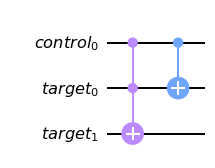

In [2]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

# WRITE YOUR CODE BETWEEN THESE LINES - START
u=QuantumCircuit(2)
u.cx(0,1)
u.x(0)
g=u.to_gate().control(1)
cu.append(g,[0,1,2])
cu=cu.decompose()
cu.draw('mpl')

### Grading

In [3]:
# Check your answer using following code
from qc_grader import grade_ex2a
grade_ex2a(cu)

Grading your answer for ex2/part1. Please wait...

Congratulations 🎉! Your answer is correct.


# 2. Circuit for $U^{2}$
$$
\begin{aligned}
U|00\rangle = |10\rangle \\
U|01\rangle = |11\rangle \\
U|10\rangle = |00\rangle \\
U|11\rangle = |01\rangle \\
\end{aligned}
$$

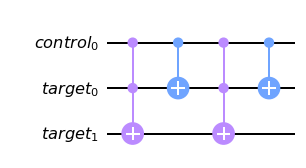

In [4]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)
cu2.append(g,[0,1,2])
cu2.append(g,[0,1,2])
cu2=cu2.decompose()
cu2.draw('mpl')

#### Grading

In [5]:
grade_ex2b(cu2)

Grading your answer for ex2/part2. Please wait...

Congratulations 🎉! Your answer is correct.


# 3. Circuit for $U^{4}$
$$
\begin{aligned}
U|00\rangle= |00\rangle \\
U|01\rangle = |01\rangle \\
U|10\rangle= |10\rangle \\
U|11\rangle = |11\rangle \\
\end{aligned}
$$

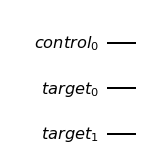

In [6]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)
cu4.draw('mpl')

#### Grading

In [7]:
grade_ex2c(cu4)

Grading your answer for ex2/part3. Please wait...

Congratulations 🎉! Your answer is correct.


# 4. Final Combined
Our task is to create a circuit that carries out the controlled-$U$s, that will be used in-between the initialization and the inverse quantum Fourier transform. More formally, we want a circuit:

$$
CU_{c_0 t}CU^2_{c_1 t}CU^4_{c_2 t}
$$
Where $c_0$, $c_1$ and $c_2$ are the three qubits in the ‘counting’ register, $t$ is the ‘target’ register, and $U$ is circuit created. In this notation, $CU_{a b}$ means $CU$ is controlled by $a$ and acts on $b$. An easy solution to this is to simply combine the circuits cu, cu2 and cu4 that you created above, but you will most likely find a more efficient circuit that has the same behavior!

Our circuit can only contain $C_{NOT}$ and single qubit $U$ gates.

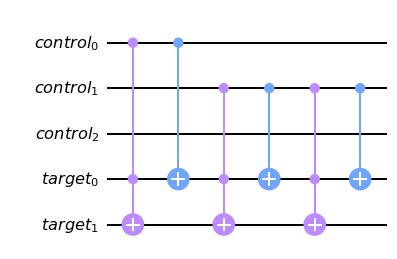

In [8]:
# Code to combine your previous solutions into your final submission
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)
solutions = [cu, cu2, cu4]
for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
cux.draw('mpl')

#### Grading

In [9]:
cux = transpile(cux, basis_gates=['cx','u'])
grade_ex2_final(cux)

Grading your answer for ex2/part4. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 15.
Feel free to submit your answer.

